In [78]:
# Importe les librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<img src='./images/logo-la-poule-qui-chante.png' width=480px />

# Produisez une étude de marché avec Python

> &#9888; Ce *notebook* est le premier des deux *notebooks* qui vont composer notre étude de marché. Il contient la préparation, le nettoyage et l’analyse exploratoire des données.

Nous sommes en poste chez **La poule qui chante**, une entreprise française d’agroalimentaire qui souhaite se développer à l'international. Cependant, la liste des pays potentiels dans lesquels s'implanter est longue. Pour cela, nous allons réaliser une analyse des groupements de pays que l'on pourra cibler grâce à différentes méthodes de *clustering*, puis nous approfondirons l'étude de marché.

Les données qui vont être utilisées seront toutes issues des [statistiques de la *Food and Agriculture Organization of the United Nations (FAO)*](https://www.fao.org/faostat/fr/#home).
Nous disposons déjà de deux de leurs jeux de données et nous allons récupérer ceux dont nous allons avoir besoin afin d'élargir les critères de l'analyse. Pour définir ces derniers, nous nous inspirons de l'analyse PESTEL. En voici la synthèse.

|Domaine            |Indicateur<sup>[1]</sup>                                                                     |Jeu de données                    |
|-------------------|---------------------------------------------------------------------------------------------|----------------------------------|
|**P**olitique      |Stabilité politique et absence de violence/terrorisme (indice)                               |Données de la sécurité alimentaire|
|                   |Importations - Quantité                                                                      |Bilans Alimentaires               |
|**E**conomique     |Revenu national brut par habitant                                                            |Indicateurs macro                 |
|                   |Croissance annuelle US$                                                                      |Indicateurs macro                 |
|**S**ocial         |Population totale et calcul de la croissance moyenne                                         |Séries temporelles et annuelles   |
|                   |Disponibilité alimentaire en quantité                                                        |Bilans Alimentaires               |
|**T**echnologique  |Production - Quantité                                                                        |Bilans Alimentaires               |
|                   |Pourcentage de la population ayant accès à des services d'eau potable gérés en toute sécurité|Données de la sécurité alimentaire|
|**E**nvironnemental|Part de superficie des terres                                                                |Utilisation des terres            |
|**L**égal          |Densité des animaux dans la superficie agricole                                              |Tendances dans l'élevage          |

*1. Les indicateurs seront donnés pour l'année 2017.*

## Sommaire

* [Création du jeu de données pour l'analyse](#1)
    * [Importation des données](#1-1)
    * [Renommage des variables](#1-2)
    * [Création du *DataFrame* final](#1-3)
        * [`df_population`](#1-3-1)
        * [`df_utilisation`](#1-3-2)
        * [`df_macro`](#1-3-3)
        * [`df_securite`](#1-3-4)
        * [`df_tendances`](#1-3-5)
        * [`df_disponibilite`](#1-3-6)
    * [Vérification de `df_final`](#1-4)
* [Analyse exploratoire](#2)

## Création du jeu de données pour l'analyse<a id='1'></a>

Nous allons importer chacun des *datasets* nécessairent puis extraire, éventuellement calculer et compiler les indicateurs dans un *DataFrame* final. 

### Importation des données<a id='1-1'></a>

In [2]:
df_securite = pd.read_csv('./datasets/securite-2017.csv')
df_securite.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,150,Pays-Bas (Royaume des),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.92,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,150,Pays-Bas (Royaume des),6121,Valeur,21045,Pourcentage de la population ayant accès à des...,2017,2017,%,99.00,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.80,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,2,Afghanistan,6121,Valeur,21045,Pourcentage de la population ayant accès à des...,2017,2017,%,25.10,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.28,X,Ciffre de sources internationales,NaN


In [3]:
print(f'Dimensions du DataFrame : {df_securite.shape}\n')

df_securite.info()

Dimensions du DataFrame : (317, 15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            317 non-null    object 
 1   Domaine                 317 non-null    object 
 2   Code zone (FAO)         317 non-null    int64  
 3   Zone                    317 non-null    object 
 4   Code Élément            317 non-null    int64  
 5   Élément                 317 non-null    object 
 6   Code Produit            317 non-null    int64  
 7   Produit                 317 non-null    object 
 8   Code année              317 non-null    int64  
 9   Année                   317 non-null    int64  
 10  Unité                   317 non-null    object 
 11  Valeur                  317 non-null    float64
 12  Symbole                 317 non-null    object 
 13  Description du Symbole  317 non-null    object 
 14  Note 

In [4]:
df_disponibilite = pd.read_csv('./datasets/dispo-alimentaire-2017.csv')
df_disponibilite.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [5]:
print(f'Dimensions du DataFrame : {df_disponibilite.shape}\n')

df_disponibilite.info()

Dimensions du DataFrame : (176600, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non

In [6]:
df_macro = pd.read_csv('./datasets/macro-2000-2017.csv')
df_macro.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,2,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2010,2010,Millions d’USD,14698.889680,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,2,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2010,2010,US$,521.428191,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,2,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2011,2011,Millions d’USD,17350.694950,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,2,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2011,2011,US$,593.203249,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,2,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2012,2012,Millions d’USD,19136.499340,X,Ciffre de sources internationales,NaN


In [7]:
df_macro.loc[df_macro['Zone'].str.contains('chine', case=False)]['Zone'].unique()

array(['Chine', 'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao',
       'Chine, continentale'], dtype=object)

In [8]:
print(f'Dimensions du DataFrame : {df_macro.shape}\n')

df_macro.info()

Dimensions du DataFrame : (6764, 15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6764 entries, 0 to 6763
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            6764 non-null   object 
 1   Domaine                 6764 non-null   object 
 2   Code zone (FAO)         6764 non-null   int64  
 3   Zone                    6764 non-null   object 
 4   Code Élément            6764 non-null   int64  
 5   Élément                 6764 non-null   object 
 6   Code Produit            6764 non-null   int64  
 7   Produit                 6764 non-null   object 
 8   Code année              6764 non-null   int64  
 9   Année                   6764 non-null   int64  
 10  Unité                   6764 non-null   object 
 11  Valeur                  6764 non-null   float64
 12  Symbole                 6764 non-null   object 
 13  Description du Symbole  6764 non-null   object 
 14  No

In [9]:
df_population = pd.read_csv('./datasets/population-2000-2018.csv')
df_population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [10]:
print(f'Dimensions du DataFrame : {df_population.shape}\n')

df_population.info()

Dimensions du DataFrame : (4411, 15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  No

In [11]:
df_utilisation = pd.read_csv('./datasets/utilisation-terres-2017.csv')
df_utilisation.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,RL,Utilisation des terres,150,Pays-Bas (Royaume des),7209,Part de superficie des terres,6610,Terres agricoles,2017,2017,%,54.02,E,Valeur estimée
1,RL,Utilisation des terres,2,Afghanistan,7209,Part de superficie des terres,6610,Terres agricoles,2017,2017,%,58.12,A,Chiffre officiel
2,RL,Utilisation des terres,202,Afrique du Sud,7209,Part de superficie des terres,6610,Terres agricoles,2017,2017,%,79.42,E,Valeur estimée
3,RL,Utilisation des terres,3,Albanie,7209,Part de superficie des terres,6610,Terres agricoles,2017,2017,%,42.86,A,Chiffre officiel
4,RL,Utilisation des terres,4,Algérie,7209,Part de superficie des terres,6610,Terres agricoles,2017,2017,%,17.36,A,Chiffre officiel


In [12]:
print(f'Dimensions du DataFrame : {df_utilisation.shape}\n')

df_utilisation.info()

Dimensions du DataFrame : (227, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            227 non-null    object 
 1   Domaine                 227 non-null    object 
 2   Code zone (FAO)         227 non-null    int64  
 3   Zone                    227 non-null    object 
 4   Code Élément            227 non-null    int64  
 5   Élément                 227 non-null    object 
 6   Code Produit            227 non-null    int64  
 7   Produit                 227 non-null    object 
 8   Code année              227 non-null    int64  
 9   Année                   227 non-null    int64  
 10  Unité                   227 non-null    object 
 11  Valeur                  227 non-null    float64
 12  Symbole                 227 non-null    object 
 13  Description du Symbole  227 non-null    object 
dtypes: fl

In [13]:
df_tendances = pd.read_csv('./datasets/tendances-2017.csv')
df_tendances.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,EK,Tendances dans l’élevage,2,Afghanistan,7213,Densité des animaux dans la superficie agricole,2151,Poulets,2017,2017,UGB/ha,0.00,E,Valeur estimée
1,EK,Tendances dans l’élevage,202,Afrique du Sud,7213,Densité des animaux dans la superficie agricole,2151,Poulets,2017,2017,UGB/ha,0.02,E,Valeur estimée
2,EK,Tendances dans l’élevage,3,Albanie,7213,Densité des animaux dans la superficie agricole,2151,Poulets,2017,2017,UGB/ha,0.07,E,Valeur estimée
3,EK,Tendances dans l’élevage,4,Algérie,7213,Densité des animaux dans la superficie agricole,2151,Poulets,2017,2017,UGB/ha,0.03,E,Valeur estimée
4,EK,Tendances dans l’élevage,79,Allemagne,7213,Densité des animaux dans la superficie agricole,2151,Poulets,2017,2017,UGB/ha,0.10,E,Valeur estimée


In [14]:
print(f'Dimensions du DataFrame : {df_tendances.shape}\n')

df_tendances.info()

Dimensions du DataFrame : (194, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            194 non-null    object 
 1   Domaine                 194 non-null    object 
 2   Code zone (FAO)         194 non-null    int64  
 3   Zone                    194 non-null    object 
 4   Code Élément            194 non-null    int64  
 5   Élément                 194 non-null    object 
 6   Code Produit (CPC)      194 non-null    int64  
 7   Produit                 194 non-null    object 
 8   Code année              194 non-null    int64  
 9   Année                   194 non-null    int64  
 10  Unité                   194 non-null    object 
 11  Valeur                  194 non-null    float64
 12  Symbole                 194 non-null    object 
 13  Description du Symbole  194 non-null    object 
dtypes: fl

### Renommage des variables<a id='1-2'></a>

Les noms de variables comprennent des majuscules, des espaces ou des accents. Pour simplifier la lecture et les manipulations, on commence par créer une fonction qui va convertir les variables selon la convention *snake case*.

In [15]:
def snake_case (df):
    """Renomme les variables d'un DataFrame selon la convention snake case."""
    df.columns = (
        df.columns
        .str.lower()
        .str.replace('\'', '_')
        .str.replace(' - ', '_')
        .str.replace('-', '_')
        .str.replace(' ', '_')
        .str.normalize('NFKD')
        .str.encode('ascii', errors='ignore')
        .str.decode('utf-8')
    )

On applique ensuite cette fonction à nos jeux de données.

In [16]:
# Crée la liste des DataFrames
dfs = ['df_securite', 'df_disponibilite', 'df_macro', 'df_population',
       'df_utilisation', 'df_tendances']

# Applique la fonction 'snake_case' aux DataFrames
for df in dfs:
    snake_case(eval(df))

### Création du *DataFrame* final<a id='1-3'></a>

Avant de commencer à extraire les informations qui nous intéressent au sein de chaque *dataset*, nous allons déterminer celui qui contient le plus de pays. C'est par ce dernier que nous commencerons afin d'avoir la liste la plus élargie possible. Si des pays doivent être retirés à cause d'un nombre de données manquantes trop important, nous le feront dans un second temps.

In [17]:
# Affiche les dimensions de chaque DataFrame
print('Nombre de pays dans le DataFrame :')
for df in dfs:
    print(df, ':', eval(df)['zone'].nunique())

del df, dfs

Nombre de pays dans le DataFrame :
df_securite : 199
df_disponibilite : 174
df_macro : 212
df_population : 238
df_utilisation : 227
df_tendances : 194


C'est le *DataFrame* de la population qui contient le plus de données, nous partons donc de celui-là puis nous ajouterons les informations par ordre décroissant de pays.

#### `df_population`<a id='1-3-1'></a>

In [18]:
df_population.head(3)

,code_domaine,domaine,code_zone,zone,code_element,element,code_produit,produit,code_annee,annee,unite,valeur,symbole,description_du_symbole,note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN


On commence par récupérer la valeur de la population en 2017 que l'on stocke dans un nouveau *DataFrame*. Chaque nouvelle variable que nous récupérerons sera ensuite ajoutée à ce dernier.

In [19]:
# Crée un nouveau DataFrame à partir de df_disponibilite
df_final = df_population.loc[
    df_population['annee'] == 2017, ['code_zone', 'zone', 'valeur' ]
].reset_index(drop=True)

# Renomme la variable 'valeur'
df_final = df_final.rename(columns={'valeur': 'population_millier_habitants'})

On calcule ensuite la tendance démographique. Pour cela, nous allons calculer le taux d'accroisement par année entre 2010 et 2017, puis nous calculerons la moyenne de ce taux.

In [20]:
# Crée un DataFrame temporaire avec les variables nécessaires
df_temp = df_population[['code_zone', 'annee', 'valeur']]

# Pivote les codes zone
df_temp = df_temp.pivot_table(index='annee', columns='code_zone',
                              values='valeur')

# Complète les valeurs manquantes par celles de la ligne précédente
df_temp = df_temp.fillna(method='bfill', axis='rows')

# Calcule l'écart en pourcentage entre deux lignes
df_temp = df_temp.pct_change()

# Calcule la moyenne de chaque colonne
df_temp = (df_temp.mean() * 100).round(2).to_frame(
    name='croissance_moyenne_population_%').reset_index()

# Ajoute le résultat au DataFrame 'df_final'
df_final = pd.merge(df_final, df_temp, on=['code_zone'], how='left')

In [21]:
del df_temp, df_population

#### `df_utilisation`<a id='1-3-2'></a>

In [22]:
df_utilisation.head(3)

,code_domaine,domaine,code_zone_(fao),zone,code_element,element,code_produit,produit,code_annee,annee,unite,valeur,symbole,description_du_symbole
0,RL,Utilisation des terres,150,Pays-Bas (Royaume des),7209,Part de superficie des terres,6610,Terres agricoles,2017,2017,%,54.02,E,Valeur estimée
1,RL,Utilisation des terres,2,Afghanistan,7209,Part de superficie des terres,6610,Terres agricoles,2017,2017,%,58.12,A,Chiffre officiel
2,RL,Utilisation des terres,202,Afrique du Sud,7209,Part de superficie des terres,6610,Terres agricoles,2017,2017,%,79.42,E,Valeur estimée


On ajoute la valeur de la part de superficie des terres agricoles et on l'ajoute à notre jeu de données final.

In [23]:
# Ajoute la variable à 'df_final'
df_final = pd.merge(
    df_final,
    df_utilisation[['code_zone_(fao)', 'valeur']],
    how='left',
    left_on=['code_zone'],
    right_on=['code_zone_(fao)']
).drop(columns='code_zone_(fao)')

# Renomme la variable 'valeur'
df_final = df_final.rename(
    columns={'valeur': 'part_terres_agricoles_%'})

In [24]:
del df_utilisation

#### `df_macro`<a id='1-3-3'></a>

In [25]:
df_macro.head(3)

,code_domaine,domaine,code_zone_(fao),zone,code_element,element,code_produit,produit,code_annee,annee,unite,valeur,symbole,description_du_symbole,note
0,MK,Indicateurs macro,2,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2010,2010,Millions d’USD,14698.889680,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,2,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2010,2010,US$,521.428191,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,2,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2011,2011,Millions d’USD,17350.694950,X,Ciffre de sources internationales,NaN


On récupère tout d'abord le revenu national brut par habitant en 2017.

In [26]:
# # Crée un DataFrame temporaire avec les variables nécessaires
df_temp = df_macro.loc[
    (df_macro['annee'] == 2017)
    & (df_macro['element'] == 'Valeur US $ par habitant')
    & (df_macro['produit'] == 'Revenu national brut'),
    ['code_zone_(fao)', 'valeur']
].reset_index(drop=True)

# Renomme la variable 'valeur'
df_temp = df_temp.rename(columns={'valeur': 'revenu_par_habitant_usd'})

# Ajoute la variable à 'df_final'
df_final = pd.merge(
    df_final,
    df_temp,
    how='left',
    left_on=['code_zone'],
    right_on=['code_zone_(fao)']
).drop(columns='code_zone_(fao)')

del df_temp

Puis on calcule le taux de croissance moyen à partir du PIB et sur la période 2000-2017.

In [27]:
# Crée un DataFrame temporaire avec les variables nécessaires
df_temp = df_macro.loc[
    (df_macro['element'] == 'Valeur US $')
    & (df_macro['produit'] == 'Produit Intérieur Brut'),
    ['code_zone_(fao)', 'annee', 'valeur']
].reset_index(drop=True)

# Pivote les codes zone
df_temp = df_temp.pivot_table(index='annee', columns='code_zone_(fao)',
                              values='valeur')

# Complète les valeurs manquantes par celles de la ligne précédente
df_temp = df_temp.fillna(method='bfill', axis='rows')

# Calcule l'écart en pourcentage entre deux lignes
df_temp = df_temp.pct_change()

# Calcule la moyenne de chaque colonne
df_temp = (df_temp.mean() * 100).round(2).to_frame(
    name='croissance_moyenne_pib_%').reset_index()

# Ajoute le résultat au DataFrame 'df_final'
df_final = pd.merge(
    df_final,
    df_temp,
    how='left',
    left_on=['code_zone'],
    right_on=['code_zone_(fao)']
).drop(columns='code_zone_(fao)')

del df_temp, df_macro

#### `df_securite`<a id='1-3-4'></a>

In [28]:
df_securite.head(3)

,code_domaine,domaine,code_zone_(fao),zone,code_element,element,code_produit,produit,code_annee,annee,unite,valeur,symbole,description_du_symbole,note
0,FS,Données de la sécurité alimentaire,150,Pays-Bas (Royaume des),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.92,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,150,Pays-Bas (Royaume des),6121,Valeur,21045,Pourcentage de la population ayant accès à des...,2017,2017,%,99.00,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.80,X,Ciffre de sources internationales,NaN


In [29]:
df_securite['produit'].unique()

array(['Stabilité politique et absence de violence/terrorisme (indice)',
       "Pourcentage de la population ayant accès à des services d'eau potable gérés en toute sécurité"],
      dtype=object)

Puis on ajoute l'indice de stabilité politique.

In [30]:
# Crée un DataFrame temporaire avec les variables nécessaires
df_temp = df_securite[['code_zone_(fao)', 'produit', 'valeur']]

# Pivote les éléments
df_temp = (
    df_temp.pivot_table(index='code_zone_(fao)', columns='produit', values='valeur')
    .reset_index()
    .rename_axis(None, axis='columns'))

# Renomme les variables
df_temp = df_temp.rename(
    columns={
        'Pourcentage de la population ayant accès à des services d\'eau potable gérés en toute sécurité': \
            'access_eau_potable_securisee_population_%',
        'Stabilité politique et absence de violence/terrorisme (indice)': \
            'indice_stabilite_politique'
    }
)

# Ajoute les variables à 'df_final'
df_final = pd.merge(
    df_final,
    df_temp[['code_zone_(fao)', 'access_eau_potable_securisee_population_%',
             'indice_stabilite_politique']],
    how='left',
    left_on=['code_zone'],
    right_on=['code_zone_(fao)']
).drop(columns='code_zone_(fao)')

del df_temp, df_securite

#### `df_tendances`<a id='1-3-5'></a>

In [31]:
df_tendances.head(3)

,code_domaine,domaine,code_zone_(fao),zone,code_element,element,code_produit_(cpc),produit,code_annee,annee,unite,valeur,symbole,description_du_symbole
0,EK,Tendances dans l’élevage,2,Afghanistan,7213,Densité des animaux dans la superficie agricole,2151,Poulets,2017,2017,UGB/ha,0.00,E,Valeur estimée
1,EK,Tendances dans l’élevage,202,Afrique du Sud,7213,Densité des animaux dans la superficie agricole,2151,Poulets,2017,2017,UGB/ha,0.02,E,Valeur estimée
2,EK,Tendances dans l’élevage,3,Albanie,7213,Densité des animaux dans la superficie agricole,2151,Poulets,2017,2017,UGB/ha,0.07,E,Valeur estimée


On ajoute la densité de poulets à notre jeu de données final.

In [32]:
# Ajoute la variable à 'df_final'
df_final = pd.merge(
    df_final,
    df_tendances[['code_zone_(fao)', 'valeur']],
    how='left',
    left_on=['code_zone'],
    right_on=['code_zone_(fao)']
).drop(columns='code_zone_(fao)')

# Renomme la variable 'valeur'
df_final = df_final.rename(
    columns={'valeur': 'densite_poulets_ugb_par_ha'})

del df_tendances

#### `df_disponibilite`<a id='1-3-6'></a>

In [33]:
df_disponibilite.head(3)

,code_domaine,domaine,code_zone,zone,code_element,element,code_produit,produit,code_annee,annee,unite,valeur,symbole,description_du_symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées


In [34]:
df_disponibilite['element'].unique()

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Exportations - Quantité', 'Disponibilité intérieure',
       'Aliments pour animaux', 'Semences', 'Pertes', 'Résidus',
       'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Traitement', 'Autres utilisations (non alimentaire)',
       'Alimentation pour touristes'], dtype=object)

On souhaite récupérer les importations, la disponibilité alimentaire et la production uniquement pour les volailles hors tous les produits sont présents dans nos données. Il faut donc trouver quelle dénomination est utilisé pour les poulets.

In [35]:
df_disponibilite.loc[
    df_disponibilite['produit'].str.contains('poulet', case=False)
]['produit'].unique()

array([], dtype=object)

In [36]:
df_disponibilite.loc[
    df_disponibilite['produit'].str.contains('volaille', case=False)
]['produit'].unique()

array(['Viande de Volailles'], dtype=object)

Il faut donc filtrer les produits avec « Viande de Volailles ».

In [37]:
# Crée la liste des éléments à garder
liste_element = ['Production', 'Importations - Quantité',
                 'Disponibilité alimentaire en quantité (kg/personne/an)']

# Crée un DataFrame temporaire avec les variables nécessaires
df_temp = df_disponibilite.loc[
    (df_disponibilite['element'].isin(liste_element))
    & (df_disponibilite['produit'] == 'Viande de Volailles')
]

# Pivote les éléments
df_temp = (
    df_temp.pivot_table(index='code_zone', columns='element', values='valeur')
    .reset_index()
    .rename_axis(None, axis='columns'))

# Renomme les variables
df_temp = df_temp.rename(
    columns={
        'Disponibilité alimentaire en quantité (kg/personne/an)': \
            'disponibilite_kg_personne_an',
        'Importations - Quantité': 'importations_milliers_tonnes',
        'Production': 'production_milliers_tonnes'
    }
)

# Ajoute les variables à 'df_final'
df_final = pd.merge(
    df_final,
    df_temp[['code_zone', 'disponibilite_kg_personne_an',
             'importations_milliers_tonnes', 'production_milliers_tonnes']],
    how='left',
    on=['code_zone']
)

del df_disponibilite, df_temp, liste_element

### Vérification de `df_final`<a id='1-4'></a>

#### Aperçu des données<a id='1-4-1'></a>

In [38]:
df_final.head()

,code_zone,zone,population_millier_habitants,croissance_moyenne_population_%,part_terres_agricoles_%,revenu_par_habitant_usd,croissance_moyenne_pib_%,access_eau_potable_securisee_population_%,indice_stabilite_politique,densite_poulets_ugb_par_ha,disponibilite_kg_personne_an,importations_milliers_tonnes,production_milliers_tonnes
0,2,Afghanistan,36296.113,3.29,58.12,537.126294,3.91,25.1,-2.80,0.00,1.53,29.0,28.0
1,202,Afrique du Sud,57009.756,1.40,79.42,6537.504869,-0.86,NaN,-0.28,0.02,35.69,514.0,1667.0
2,3,Albanie,2884.169,-0.45,42.86,4532.791976,1.56,70.6,0.38,0.07,16.36,38.0,13.0
3,4,Algérie,41389.189,1.72,17.36,4081.775086,1.60,74.6,-0.92,0.03,6.38,2.0,275.0
4,79,Allemagne,82658.409,0.12,47.76,45734.557505,1.50,99.0,0.59,0.10,19.47,842.0,1514.0


In [54]:
print('Dimensions du DataFrame:', df_final.shape)

Dimensions du DataFrame: (168, 12)


#### Réorganisation des variables<a id='1-4-2'></a>

In [40]:
# Suppression de 'code_zone'
df_final = df_final.drop(columns='code_zone')

# Réorganisation de l'ordre des variables
df_final = df_final[[
    'zone', 'indice_stabilite_politique', 'importations_milliers_tonnes',
    'revenu_par_habitant_usd', 'croissance_moyenne_pib_%',
    'population_millier_habitants', 'croissance_moyenne_population_%',
    'disponibilite_kg_personne_an', 'production_milliers_tonnes',
    'access_eau_potable_securisee_population_%', 'part_terres_agricoles_%',
    'densite_poulets_ugb_par_ha'
]]

#### Type des données<a id='1-4-3'></a>

In [41]:
df_final.dtypes

zone                                          object
indice_stabilite_politique                   float64
importations_milliers_tonnes                 float64
revenu_par_habitant_usd                      float64
croissance_moyenne_pib_%                     float64
population_millier_habitants                 float64
croissance_moyenne_population_%              float64
disponibilite_kg_personne_an                 float64
production_milliers_tonnes                   float64
access_eau_potable_securisee_population_%    float64
part_terres_agricoles_%                      float64
densite_poulets_ugb_par_ha                   float64
dtype: object

Le type des données est correct.

#### Doublons<a id='1-4-4'></a>

In [42]:
print('Nombre de doublons dans le DataFrame :', df_final.duplicated().sum())

Nombre de doublons dans le DataFrame : 0


#### Valeurs manquantes<a id='1-4-5'></a>

In [43]:
df_final.isna().sum()

zone                                           0
indice_stabilite_politique                    40
importations_milliers_tonnes                  66
revenu_par_habitant_usd                       26
croissance_moyenne_pib_%                      25
population_millier_habitants                   0
croissance_moyenne_population_%                0
disponibilite_kg_personne_an                  64
production_milliers_tonnes                    68
access_eau_potable_securisee_population_%    115
part_terres_agricoles_%                       11
densite_poulets_ugb_par_ha                    43
dtype: int64

Le nombre de valeurs manquantes est assez important. Dans un premier temps, nous allons supprimer les enregistrements qui ont un nombre de valeurs manquantes supérieur ou égal à 6 (sur 11 indicateurs).

In [44]:
df_final = (
    df_final[df_final.isna().sum(axis='columns') < 6]).reset_index(drop=True)

df_final.isna().sum()

zone                                          0
indice_stabilite_politique                    5
importations_milliers_tonnes                 30
revenu_par_habitant_usd                       1
croissance_moyenne_pib_%                      1
population_millier_habitants                  0
croissance_moyenne_population_%               0
disponibilite_kg_personne_an                 28
production_milliers_tonnes                   32
access_eau_potable_securisee_population_%    81
part_terres_agricoles_%                       1
densite_poulets_ugb_par_ha                    9
dtype: int64

Dans un second temps, nous supprimons les pays pour lesquels nous n'avons ni la valeur des importations, ni celle de la production et ni celle de la disponibilité.

In [45]:
df_final = df_final.loc[
    (~df_final['importations_milliers_tonnes'].isna())
    & (~df_final['disponibilite_kg_personne_an'].isna())
    & (~df_final['production_milliers_tonnes'].isna())
].reset_index(drop=True)

df_final.isna().sum()

zone                                          0
indice_stabilite_politique                    4
importations_milliers_tonnes                  0
revenu_par_habitant_usd                       1
croissance_moyenne_pib_%                      1
population_millier_habitants                  0
croissance_moyenne_population_%               0
disponibilite_kg_personne_an                  0
production_milliers_tonnes                    0
access_eau_potable_securisee_population_%    62
part_terres_agricoles_%                       1
densite_poulets_ugb_par_ha                    2
dtype: int64

La dernière grosse quantité de valeurs manquantes concerne l'accès à l'eau potable sécurisée. L'intérêt de cette indicateur est qu'il es plus sélectif que l'accès à l'eau potable classique. Cela permet d'avoir une indication sur le niveau technologique des infrastructures du pays. Si il n'y a pas d'accès sécurisé, on peut donc prendre l'hypothèse que la valeur est de 0 %.

In [46]:
df_final['access_eau_potable_securisee_population_%'] = (
    df_final['access_eau_potable_securisee_population_%'].fillna(0))

df_final.isna().sum()

zone                                         0
indice_stabilite_politique                   4
importations_milliers_tonnes                 0
revenu_par_habitant_usd                      1
croissance_moyenne_pib_%                     1
population_millier_habitants                 0
croissance_moyenne_population_%              0
disponibilite_kg_personne_an                 0
production_milliers_tonnes                   0
access_eau_potable_securisee_population_%    0
part_terres_agricoles_%                      1
densite_poulets_ugb_par_ha                   2
dtype: int64

In [47]:
df_final[df_final.isna().any(axis='columns')]

,zone,indice_stabilite_politique,importations_milliers_tonnes,revenu_par_habitant_usd,croissance_moyenne_pib_%,population_millier_habitants,croissance_moyenne_population_%,disponibilite_kg_personne_an,production_milliers_tonnes,access_eau_potable_securisee_population_%,part_terres_agricoles_%,densite_poulets_ugb_par_ha
32,Chine - RAS de Macao,1.43,23.0,70300.937271,9.65,622.585,2.19,34.47,3.0,99.0,NaN,NaN
33,"Chine, continentale",NaN,452.0,8717.698270,10.77,1421021.791,0.56,12.33,18236.0,0.0,55.62,0.10
34,"Chine, Taiwan Province de",NaN,161.0,NaN,NaN,23674.546,0.43,33.17,652.0,0.0,22.39,1.19
51,États-Unis d'Amérique,0.29,123.0,60297.391594,3.75,325084.756,0.83,55.68,21914.0,96.8,44.36,NaN
113,Nouvelle-Calédonie,NaN,9.0,32263.340715,0.13,277.150,1.42,38.71,1.0,96.0,10.07,0.03
124,Polynésie française,NaN,15.0,19743.958991,-0.34,276.102,0.80,47.40,1.0,86.2,13.40,0.07


In [48]:
df_final.loc[32, ['part_terres_agricoles_%', 'densite_poulets_ugb_par_ha']] = 0

In [49]:
indice = df_final.loc[df_final['zone'].str.contains('rance'), 'indice_stabilite_politique'].values[0]

df_final.loc[[113, 124], 'indice_stabilite_politique'] = indice

del indice

In [50]:
df_final.loc[df_final['zone'].str.contains('hine')]

,zone,indice_stabilite_politique,importations_milliers_tonnes,revenu_par_habitant_usd,croissance_moyenne_pib_%,population_millier_habitants,croissance_moyenne_population_%,disponibilite_kg_personne_an,production_milliers_tonnes,access_eau_potable_securisee_population_%,part_terres_agricoles_%,densite_poulets_ugb_par_ha
31,Chine - RAS de Hong-Kong,0.83,907.0,47724.637597,5.90,7306.322,0.61,53.51,24.0,99.0,4.86,2.55
32,Chine - RAS de Macao,1.43,23.0,70300.937271,9.65,622.585,2.19,34.47,3.0,99.0,0.00,0.00
33,"Chine, continentale",NaN,452.0,8717.698270,10.77,1421021.791,0.56,12.33,18236.0,0.0,55.62,0.10
34,"Chine, Taiwan Province de",NaN,161.0,NaN,NaN,23674.546,0.43,33.17,652.0,0.0,22.39,1.19


## Analyse exploratoire<a id='2'></a>

In [53]:
print('Nombre de pays dans le jeu de données :', df_final['zone'].nunique())

Nombre de pays dans le jeu de données : 168


In [55]:
df_final.describe()

,indice_stabilite_politique,importations_milliers_tonnes,revenu_par_habitant_usd,croissance_moyenne_pib_%,population_millier_habitants,croissance_moyenne_population_%,disponibilite_kg_personne_an,production_milliers_tonnes,access_eau_potable_securisee_population_%,part_terres_agricoles_%,densite_poulets_ugb_par_ha
count,166.000000,168.000000,167.000000,167.000000,1.680000e+02,168.00000,168.000000,168.000000,168.000000,168.000000,167.000000
mean,-0.065060,90.505952,13766.556876,3.937186,4.362160e+04,1.35875,20.521726,725.190476,45.043452,38.806548,0.253533
std,0.904441,187.566547,18299.979960,3.638560,1.547882e+05,1.22240,15.901410,2501.457125,41.892218,20.782010,0.770935
min,-2.940000,0.000000,435.871219,-6.270000,5.204500e+01,-1.23000,0.130000,0.000000,0.000000,0.000000,0.000000
25%,-0.627500,3.000000,1890.051387,1.335000,2.911678e+03,0.48000,6.910000,13.750000,0.000000,22.367500,0.020000
50%,0.015000,16.000000,5934.255910,3.860000,9.815582e+03,1.25500,18.300000,70.000000,42.150000,39.590000,0.060000
75%,0.650000,82.500000,17100.416654,6.100000,3.013874e+04,2.22500,30.317500,409.750000,93.550000,52.482500,0.140000
max,1.600000,1069.000000,81118.449926,16.890000,1.421022e+06,6.58000,72.310000,21914.000000,99.000000,81.270000,6.990000


<Axes: ylabel='zone'>

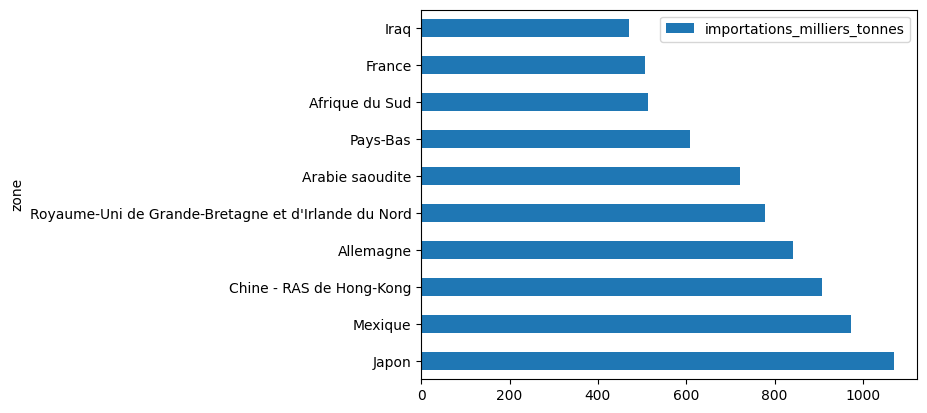

In [75]:
# Top 10 importateurs de poulets
df_final[['zone', 'importations_milliers_tonnes']].nlargest(10, 'importations_milliers_tonnes').plot.barh(x='zone')

<Axes: ylabel='zone'>

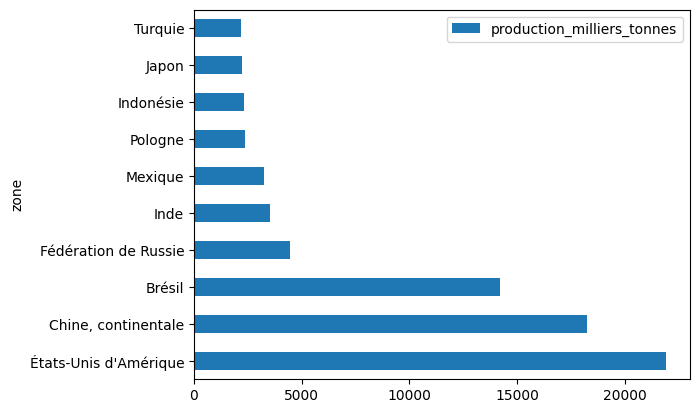

In [74]:
# Top 10 producteurs de poulets
df_final[['zone', 'production_milliers_tonnes']].nlargest(10, 'production_milliers_tonnes').plot.barh(x='zone')

In [86]:
vars = ['indice_stabilite_politique', 'importations_milliers_tonnes',
       'revenu_par_habitant_usd', 'croissance_moyenne_pib_%',
       'population_millier_habitants', 'croissance_moyenne_population_%',
       'disponibilite_kg_personne_an', 'production_milliers_tonnes',
       'access_eau_potable_securisee_population_%', 'part_terres_agricoles_%',
       'densite_poulets_ugb_par_ha']

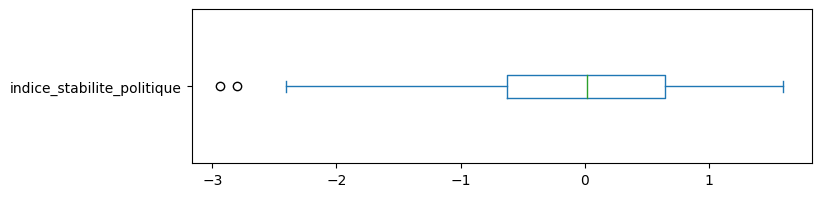

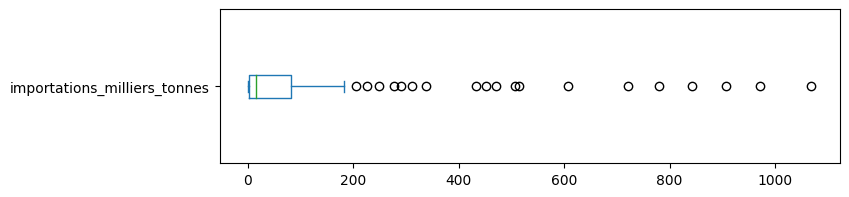

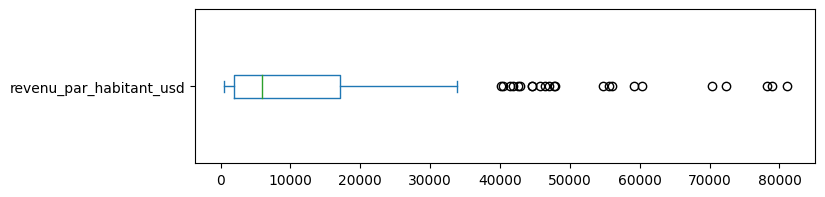

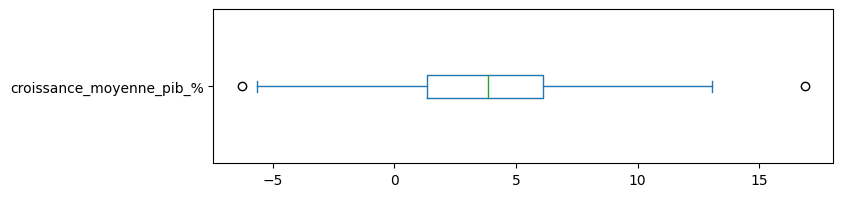

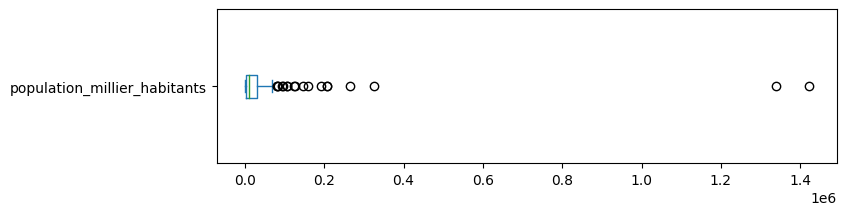

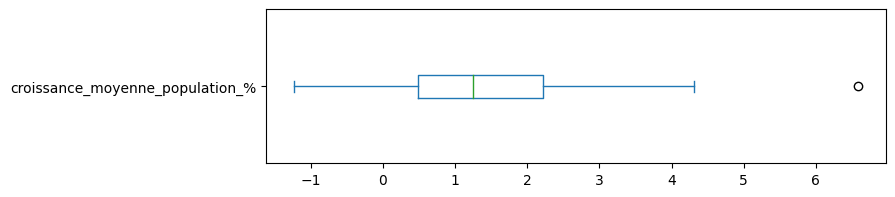

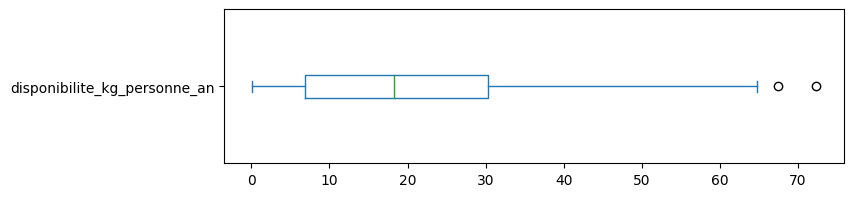

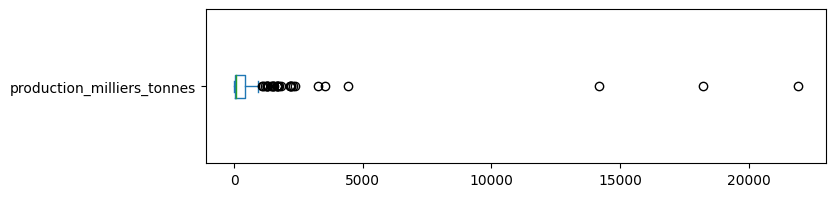

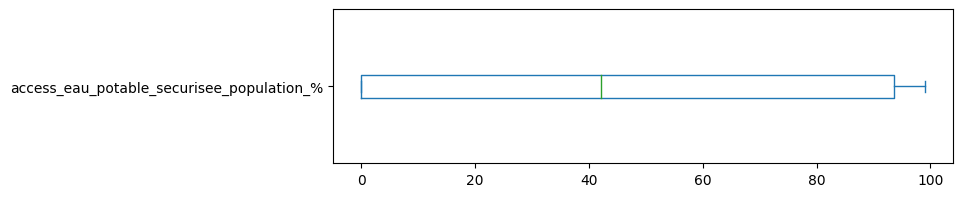

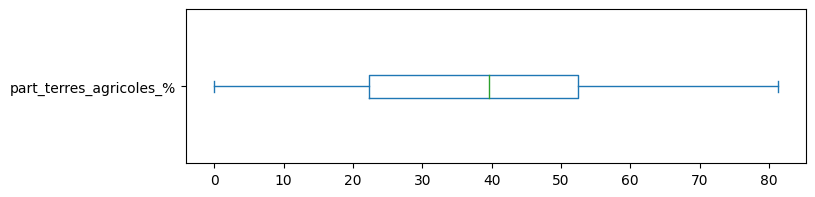

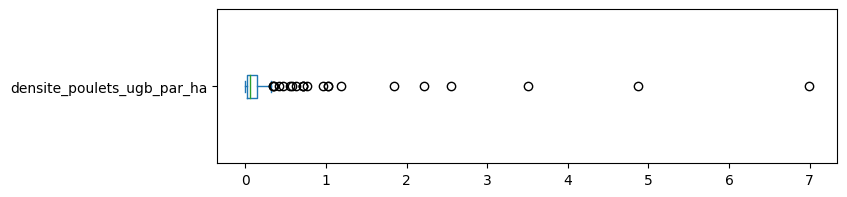

In [94]:
for var in vars:
    df_final[var].plot.box(vert=False, figsize=(8,2))
    plt.show()

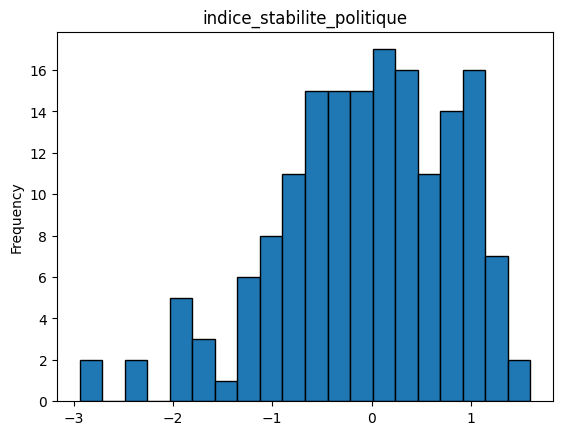

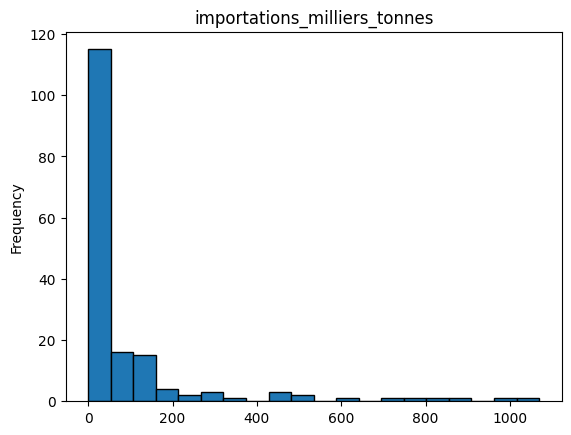

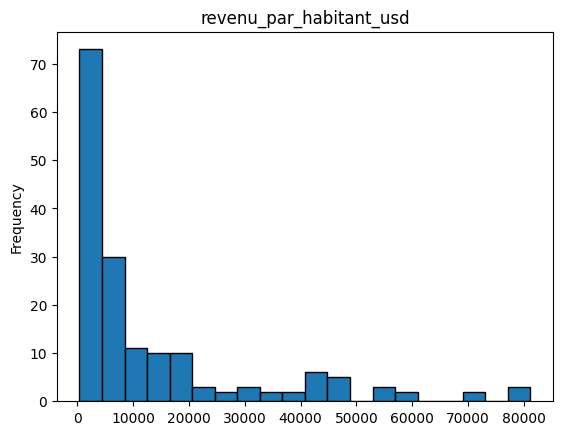

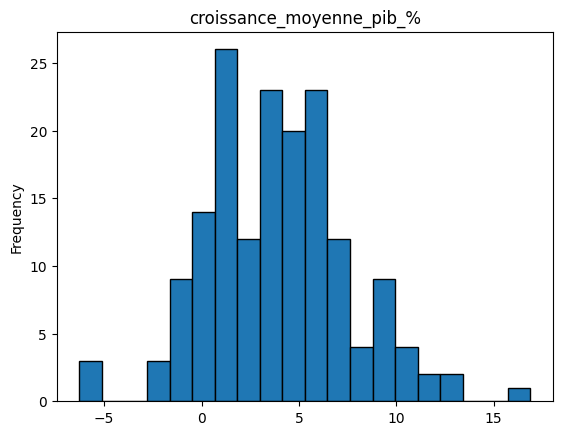

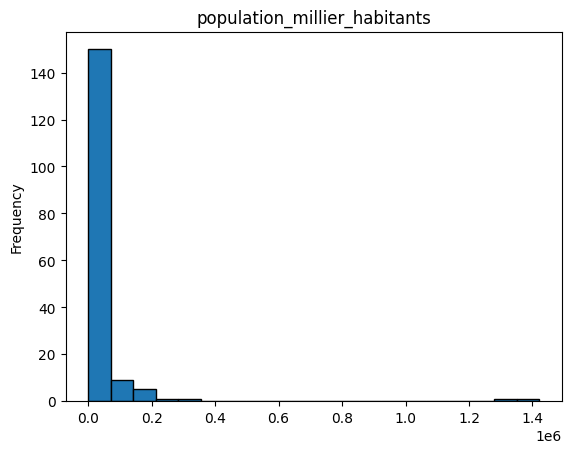

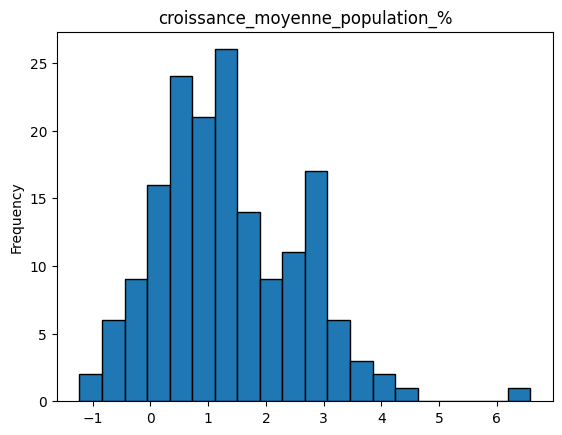

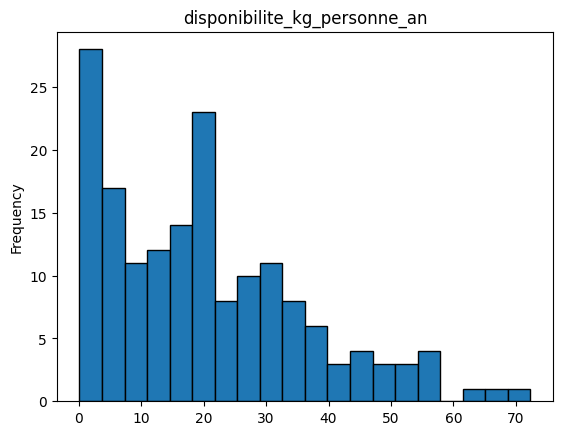

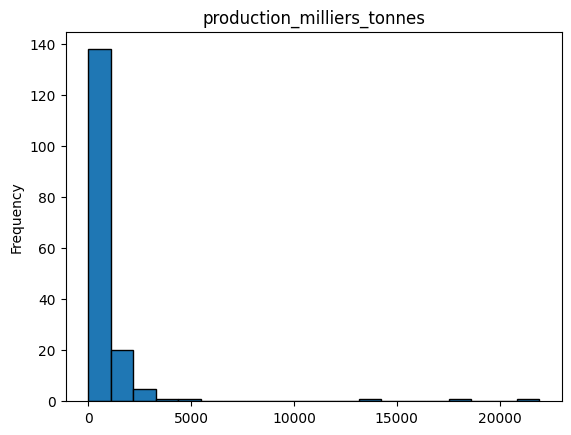

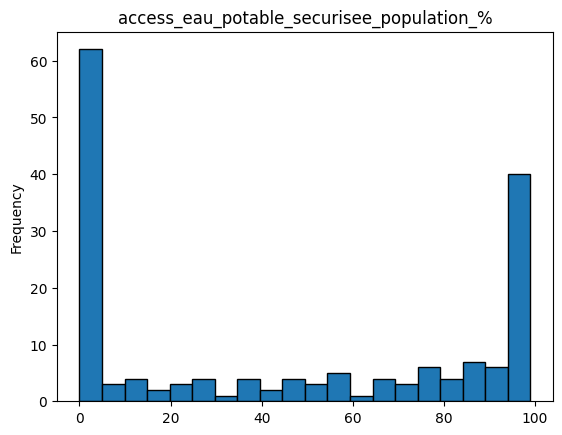

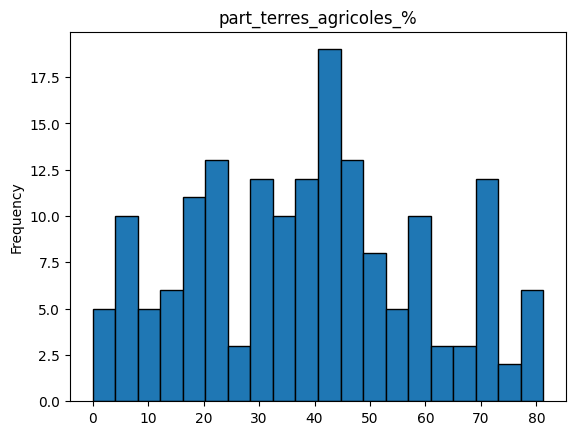

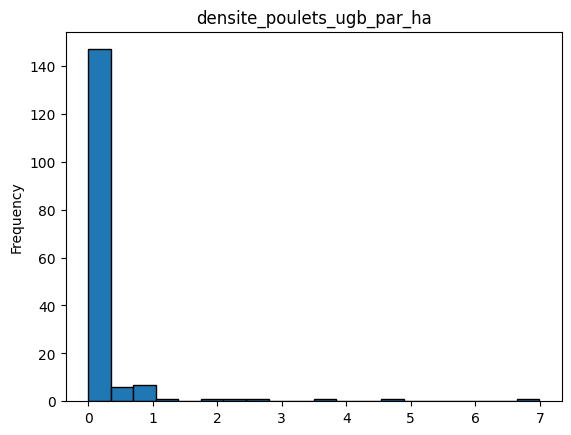

In [105]:
for var in vars:
    df_final[var].plot.hist(bins=20, edgecolor='0', title=var)
    plt.show()

In [122]:
df_final.corr(numeric_only=True)

,indice_stabilite_politique,importations_milliers_tonnes,revenu_par_habitant_usd,croissance_moyenne_pib_%,population_millier_habitants,croissance_moyenne_population_%,disponibilite_kg_personne_an,production_milliers_tonnes,access_eau_potable_securisee_population_%,part_terres_agricoles_%,densite_poulets_ugb_par_ha
indice_stabilite_politique,1.000000,0.091305,0.558753,-0.115163,-0.196845,-0.366873,0.440188,-0.041648,0.304510,-0.241385,0.137614
importations_milliers_tonnes,0.091305,1.000000,0.294146,-0.148979,0.149715,-0.061684,0.174323,0.193159,0.196907,0.056300,0.076111
revenu_par_habitant_usd,0.558753,0.294146,1.000000,-0.201693,-0.044299,-0.183494,0.391140,0.134474,0.530099,-0.208067,0.126062
croissance_moyenne_pib_%,-0.115163,-0.148979,-0.201693,1.000000,0.152636,0.277004,-0.227692,-0.003664,-0.287490,0.083215,-0.082500
population_millier_habitants,-0.196845,0.149715,-0.044299,0.152636,1.000000,-0.029235,-0.094137,0.618553,-0.102397,0.129104,-0.040638
croissance_moyenne_population_%,-0.366873,-0.061684,-0.183494,0.277004,-0.029235,1.000000,-0.264601,-0.113477,-0.415376,-0.052351,-0.043825
disponibilite_kg_personne_an,0.440188,0.174323,0.391140,-0.227692,-0.094137,-0.264601,1.000000,0.189344,0.199502,-0.364556,0.375291
production_milliers_tonnes,-0.041648,0.193159,0.134474,-0.003664,0.618553,-0.113477,0.189344,1.000000,0.086025,0.045464,-0.041342
access_eau_potable_securisee_population_%,0.304510,0.196907,0.530099,-0.287490,-0.102397,-0.415376,0.199502,0.086025,1.000000,-0.071035,-0.056428
part_terres_agricoles_%,-0.241385,0.056300,-0.208067,0.083215,0.129104,-0.052351,-0.364556,0.045464,-0.071035,1.000000,-0.253082


<Axes: >

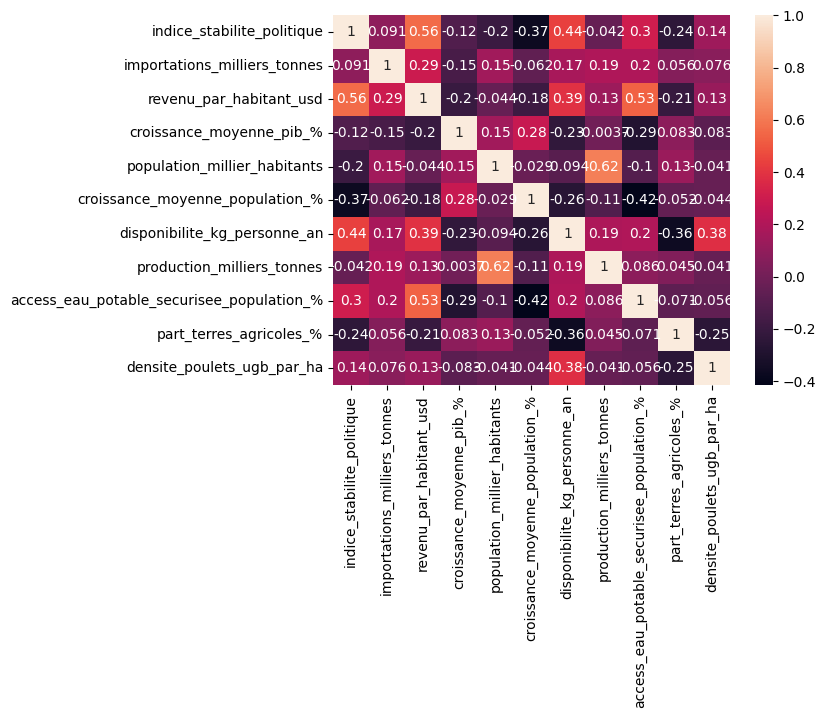

In [118]:
sns.heatmap(df_final.corr(numeric_only=True))

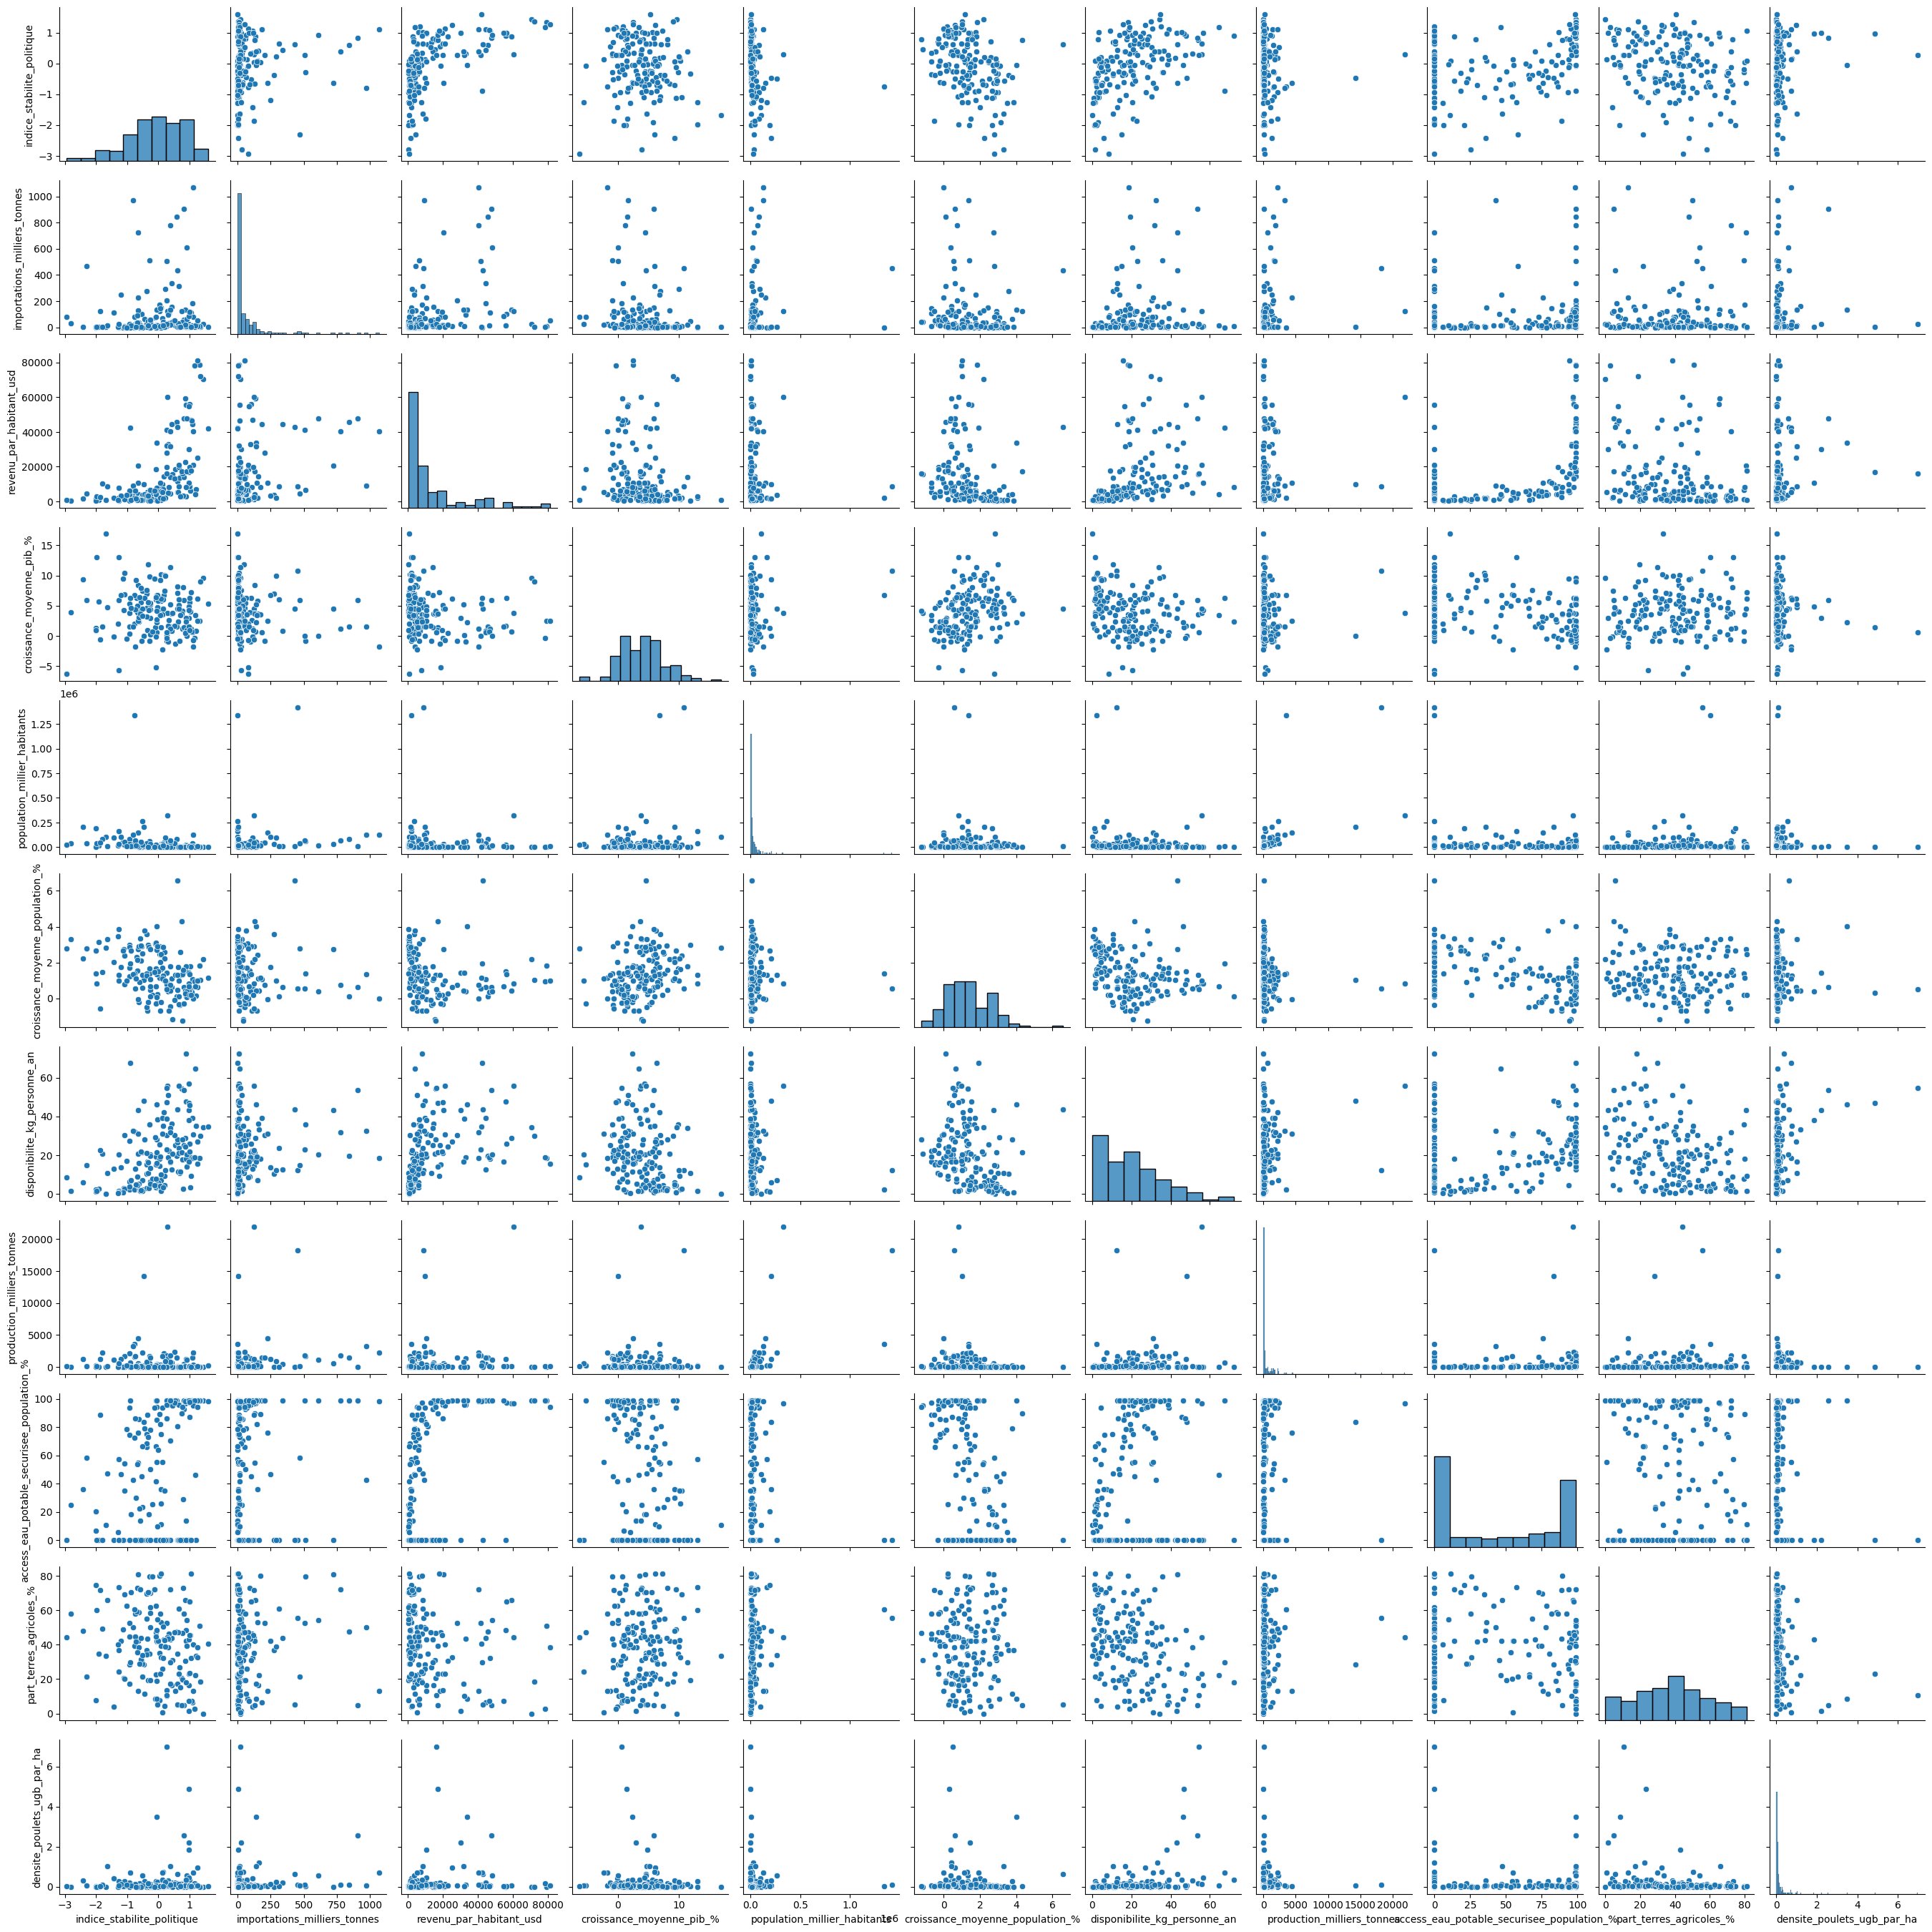

In [121]:
sns.pairplot(df_final)